# Exploratory Data Analysis (EDA)
## Exchange Rate Analysis Project - Component 3

---

### 🎯 Objectives
- Understand the distribution and patterns in exchange rate data
- Identify trends, seasonality, and anomalies
- Explore relationships between currencies and regions
- Generate initial insights for deeper analysis
- Create compelling visualizations

### 📋 EDA Checklist
- [ ] Load cleaned data and basic statistics
- [ ] Distribution analysis
- [ ] Time series trend analysis
- [ ] Volatility exploration
- [ ] Correlation analysis
- [ ] Regional and currency grouping
- [ ] Missing data patterns
- [ ] Outlier investigation

---

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from datetime import datetime
from scipy import stats
import json

# Configure display and plotting
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("📚 Libraries imported successfully!")
print(f"📅 EDA started: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

📚 Libraries imported successfully!
📅 EDA started: 2025-08-25 21:08:35


## 3.1 Load Data and Basic Overview

In [2]:
# Load the cleaned dataset
df = pd.read_csv('data/cleaned_exchange_rates.csv')
df['date'] = pd.to_datetime(df['date'])

# Load cleaning summary
with open('data/cleaning_summary.json', 'r') as f:
    cleaning_summary = json.load(f)

print("📊 Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Countries: {df['country'].nunique()}")
print(f"Time periods: {df['quarter'].nunique()}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n🧹 Cleaning Summary:")
for key, value in cleaning_summary.items():
    if key != 'features_created':
        print(f"{key}: {value}")

# Display sample data
print("\n📋 Sample Data:")
df.head()

📊 Dataset Overview:
Shape: (13923, 11)
Countries: 191
Time periods: 63
Date range: 2001-03-01 00:00:00 to 2016-09-01 00:00:00
Memory usage: 3.07 MB

🧹 Cleaning Summary:
total_records: 13923
countries: 191
time_periods: 63
date_range: 2001-03-01 00:00:00 to 2016-09-01 00:00:00
missing_exchange_rates: 2183
missing_percentage: 15.68%
outliers_detected: 1652

📋 Sample Data:


,country,currency_unit,date,year,quarter_num,quarter,exchange_rate,quarterly_return,log_return,volatility_4q,ma_4q
0,Afghanistan,Afghani,2001-03-01,2001,1,2001Q1,78400.0000,NaN,NaN,NaN,78400.0000
1,Afghanistan,Afghani,2001-06-01,2001,2,2001Q2,73000.0000,-6.8878,-7.1364,NaN,75700.0000
2,Afghanistan,Afghani,2001-09-01,2001,3,2001Q3,71500.0000,-2.0548,-2.0762,3.4174,74300.0000
3,Afghanistan,Afghani,2001-12-01,2001,4,2001Q4,38200.0000,-46.5734,-62.6862,24.4275,65275.0000
4,Afghanistan,Afghani,2002-03-01,2002,1,2002Q1,35000.0000,-8.3770,-8.7487,20.5779,54425.0000


In [3]:
# Basic statistical summary
print("📊 Exchange Rate Statistics:")
exchange_stats = df['exchange_rate'].describe()
print(exchange_stats)

print("\n📈 Additional Statistics:")
print(f"Skewness: {df['exchange_rate'].skew():.4f}")
print(f"Kurtosis: {df['exchange_rate'].kurtosis():.4f}")
print(f"Zero values: {(df['exchange_rate'] == 0).sum()}")
print(f"Negative values: {(df['exchange_rate'] < 0).sum()}")
print(f"Missing values: {df['exchange_rate'].isnull().sum()}")

# Percentiles
percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
print("\n📊 Percentile Analysis:")
for p in percentiles:
    value = df['exchange_rate'].quantile(p/100)
    print(f"{p}th percentile: {value:.4f}")

📊 Exchange Rate Statistics:
count        11740.0000
mean       3202838.9099
std      147229381.9597
min              0.0090
25%              1.7800
50%             12.1175
75%            290.0000
max     8310000000.0000
Name: exchange_rate, dtype: float64

📈 Additional Statistics:
Skewness: 48.5324
Kurtosis: 2441.0263
Zero values: 0
Negative values: 0
Missing values: 2183

📊 Percentile Analysis:
1th percentile: 0.3770
5th percentile: 0.7200
10th percentile: 0.8140
25th percentile: 1.7800
50th percentile: 12.1175
75th percentile: 290.0000
90th percentile: 1600.0000
95th percentile: 5185.7500
99th percentile: 21858.3543


## 3.2 Distribution Analysis

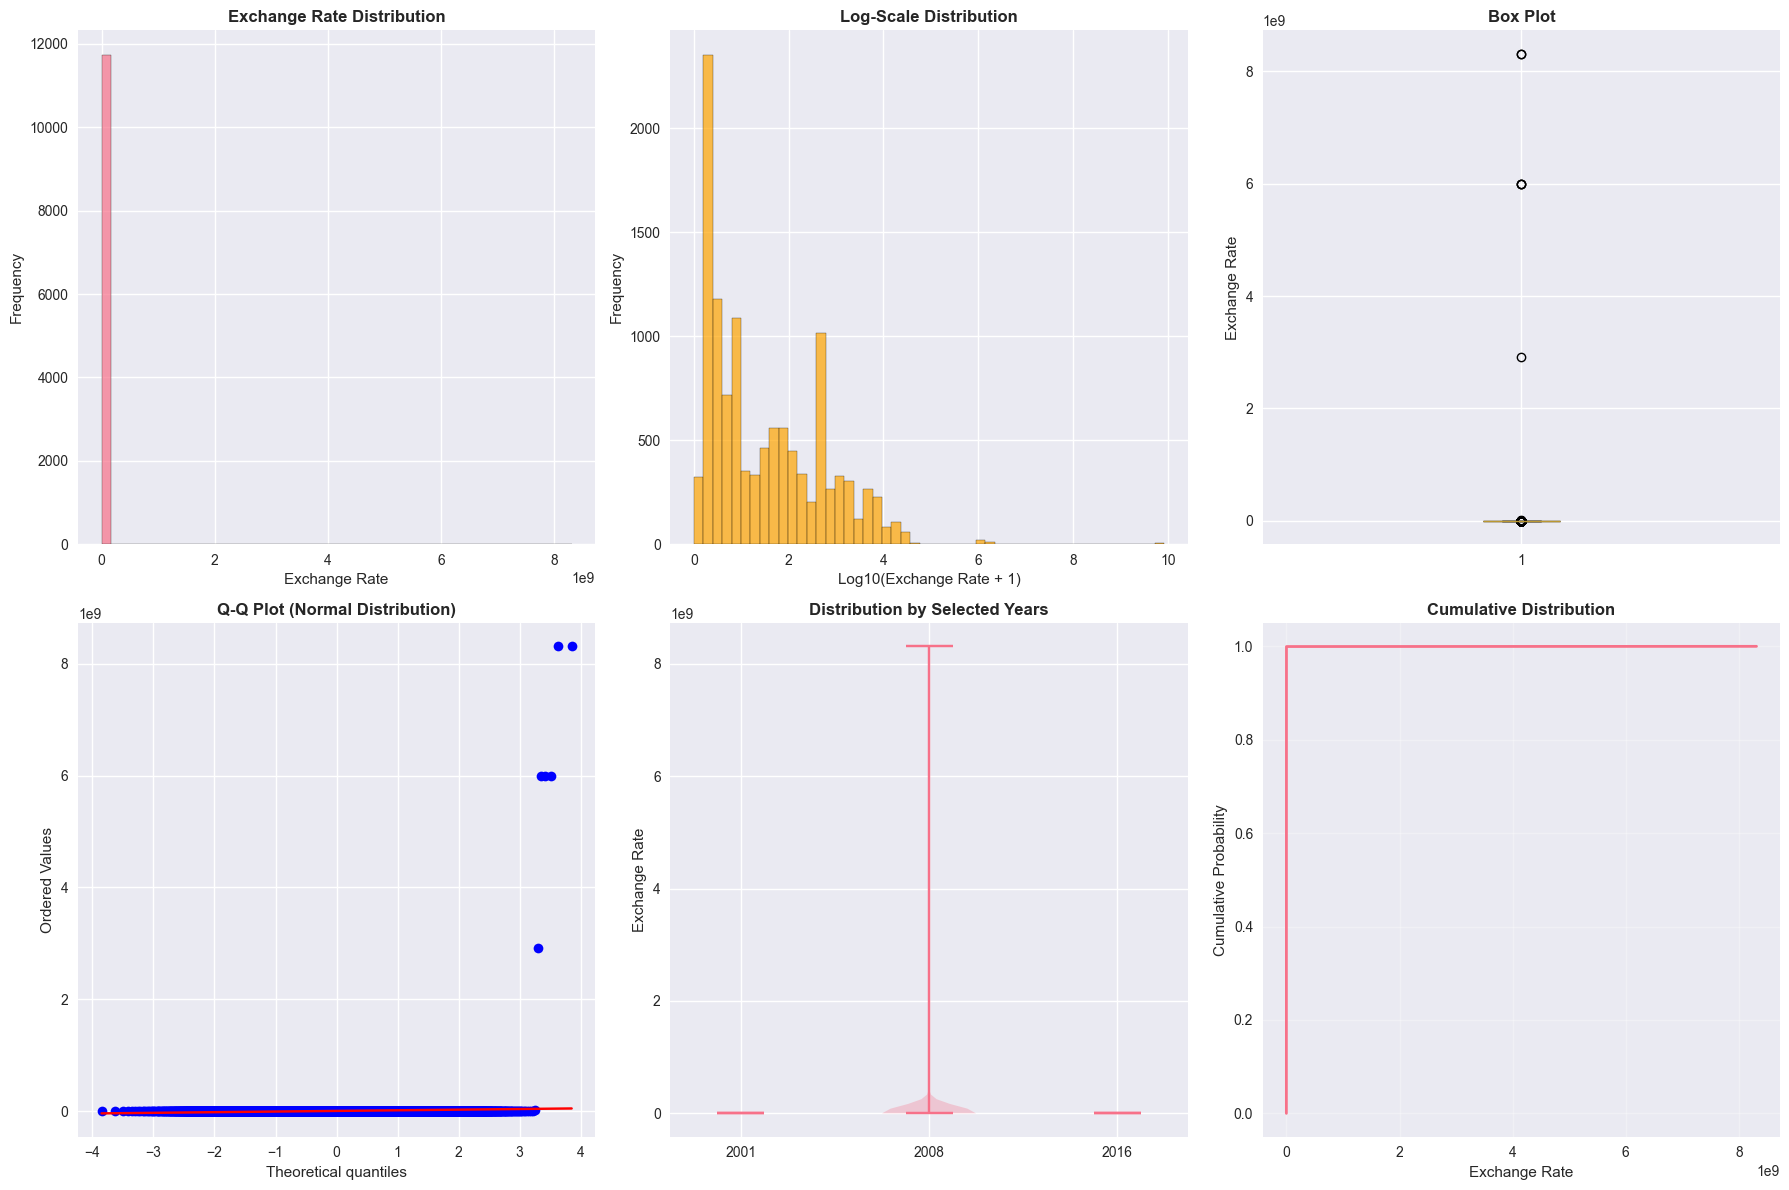

📊 Distribution Insights:
The distribution is highly right-skewed (skewness: 48.53)
Most currencies have exchange rates below 290.00
The top 1% of exchange rates are above 21858.35


In [4]:
# Distribution visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Remove missing values for distribution analysis
exchange_clean = df['exchange_rate'].dropna()

# 1. Histogram
axes[0, 0].hist(exchange_clean, bins=50, alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Exchange Rate Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Exchange Rate')
axes[0, 0].set_ylabel('Frequency')

# 2. Log-scale histogram
log_rates = np.log10(exchange_clean + 1)
axes[0, 1].hist(log_rates, bins=50, alpha=0.7, edgecolor='black', color='orange')
axes[0, 1].set_title('Log-Scale Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Log10(Exchange Rate + 1)')
axes[0, 1].set_ylabel('Frequency')

# 3. Box plot
axes[0, 2].boxplot(exchange_clean, patch_artist=True)
axes[0, 2].set_title('Box Plot', fontweight='bold')
axes[0, 2].set_ylabel('Exchange Rate')

# 4. Q-Q plot
stats.probplot(exchange_clean, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot (Normal Distribution)', fontweight='bold')

# 5. Violin plot by year (sample)
sample_years = [2001, 2008, 2016]
sample_data = [df[df['year'] == year]['exchange_rate'].dropna() for year in sample_years]
axes[1, 1].violinplot(sample_data, positions=range(len(sample_years)))
axes[1, 1].set_xticks(range(len(sample_years)))
axes[1, 1].set_xticklabels(sample_years)
axes[1, 1].set_title('Distribution by Selected Years', fontweight='bold')
axes[1, 1].set_ylabel('Exchange Rate')

# 6. Cumulative distribution
sorted_rates = np.sort(exchange_clean)
cumulative = np.arange(1, len(sorted_rates) + 1) / len(sorted_rates)
axes[1, 2].plot(sorted_rates, cumulative, linewidth=2)
axes[1, 2].set_title('Cumulative Distribution', fontweight='bold')
axes[1, 2].set_xlabel('Exchange Rate')
axes[1, 2].set_ylabel('Cumulative Probability')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Distribution insights
print("📊 Distribution Insights:")
print(f"The distribution is highly right-skewed (skewness: {df['exchange_rate'].skew():.2f})")
print(f"Most currencies have exchange rates below {df['exchange_rate'].quantile(0.75):.2f}")
print(f"The top 1% of exchange rates are above {df['exchange_rate'].quantile(0.99):.2f}")

## 3.3 Time Series Trend Analysis

📈 Time Series Analysis:
Time series length: 63 quarters
Average currencies per quarter: 186
Data availability range: 175-197 currencies


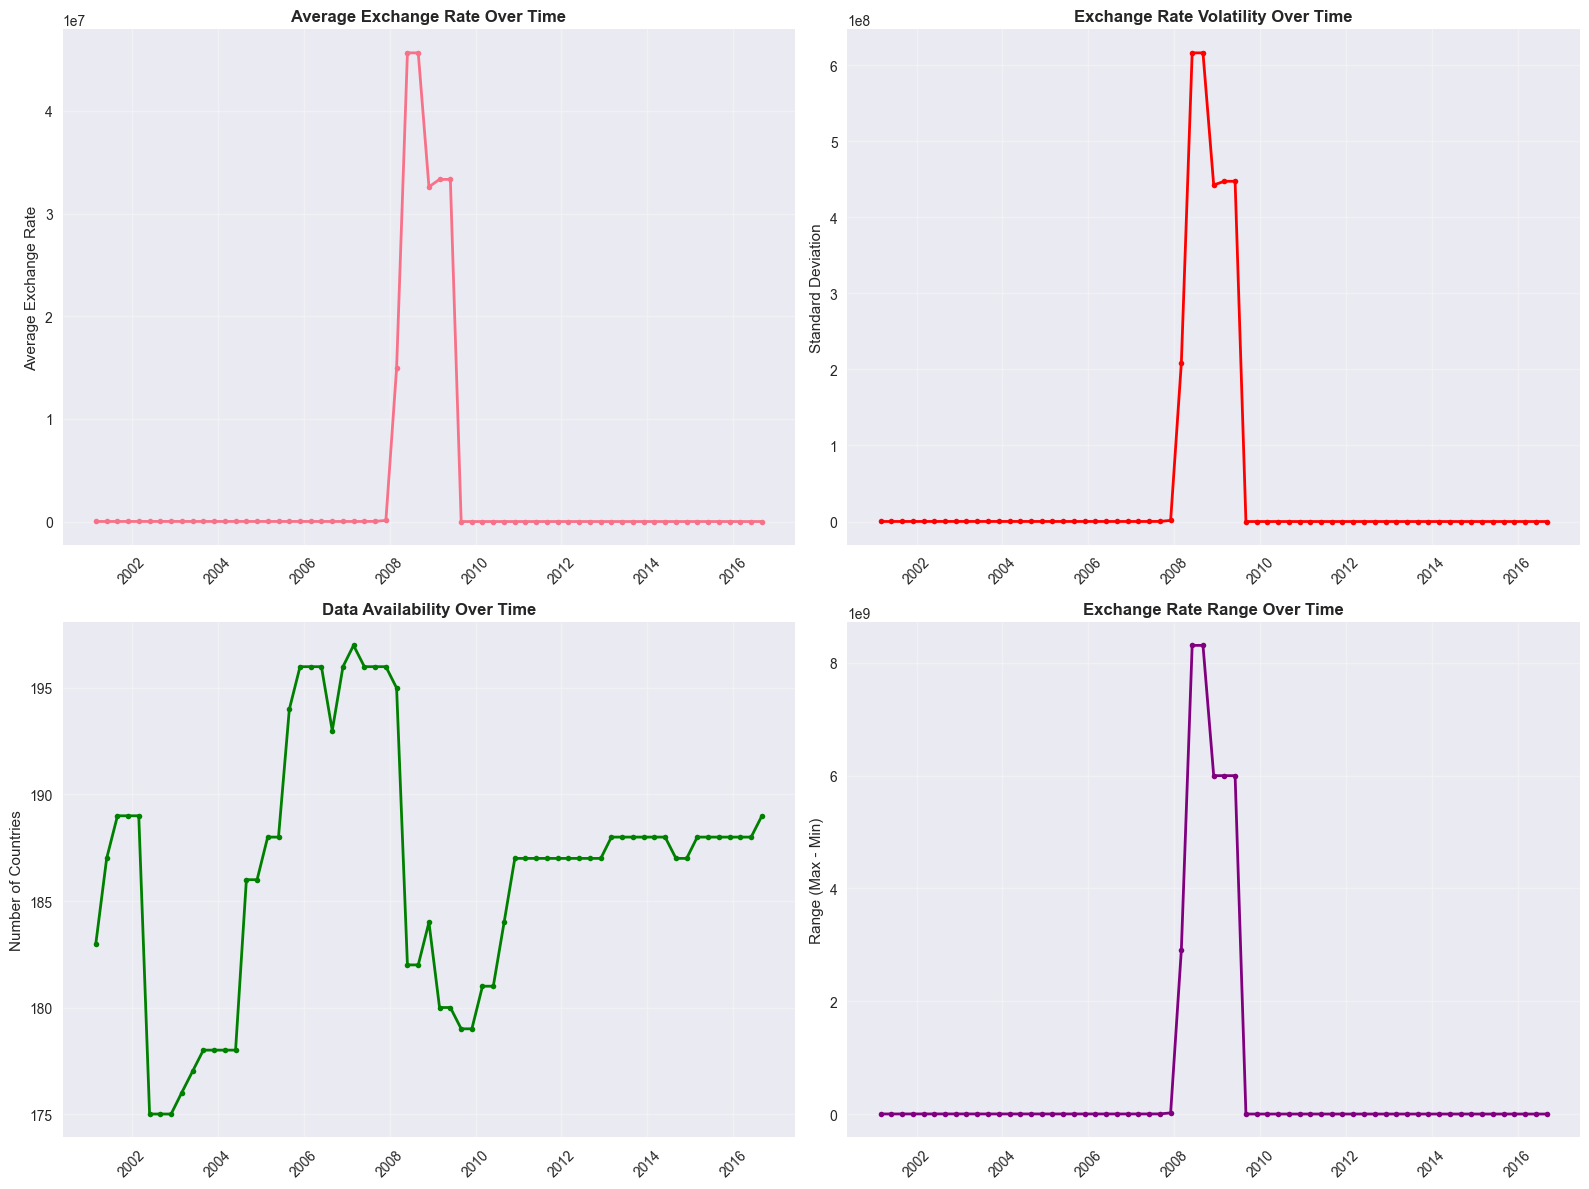


🔥 Periods of Highest Volatility:
2008 Q3: σ = 615978134.89
2008 Q2: σ = 615978133.85
2009 Q2: σ = 447213547.66
2009 Q1: σ = 447213547.20
2008 Q4: σ = 442325815.76


In [6]:
# Overall time series trends
print("📈 Time Series Analysis:")

# Calculate aggregate statistics by quarter
quarterly_stats = df.groupby('date').agg({
    'exchange_rate': ['count', 'mean', 'median', 'std', 'min', 'max']
}).round(4)

quarterly_stats.columns = ['count', 'mean', 'median', 'std', 'min', 'max']
quarterly_stats = quarterly_stats.reset_index()

print(f"Time series length: {len(quarterly_stats)} quarters")
print(f"Average currencies per quarter: {quarterly_stats['count'].mean():.0f}")
print(f"Data availability range: {quarterly_stats['count'].min()}-{quarterly_stats['count'].max()} currencies")

# Plot time series trends
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Mean exchange rate over time
axes[0, 0].plot(quarterly_stats['date'], quarterly_stats['mean'], linewidth=2, marker='o', markersize=4)
axes[0, 0].set_title('Average Exchange Rate Over Time', fontweight='bold')
axes[0, 0].set_ylabel('Average Exchange Rate')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Volatility over time (standard deviation)
axes[0, 1].plot(quarterly_stats['date'], quarterly_stats['std'], linewidth=2, marker='o', markersize=4, color='red')
axes[0, 1].set_title('Exchange Rate Volatility Over Time', fontweight='bold')
axes[0, 1].set_ylabel('Standard Deviation')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Data availability over time
axes[1, 0].plot(quarterly_stats['date'], quarterly_stats['count'], linewidth=2, marker='o', markersize=4, color='green')
axes[1, 0].set_title('Data Availability Over Time', fontweight='bold')
axes[1, 0].set_ylabel('Number of Countries')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Range (max - min) over time
quarterly_stats['range'] = quarterly_stats['max'] - quarterly_stats['min']
axes[1, 1].plot(quarterly_stats['date'], quarterly_stats['range'], linewidth=2, marker='o', markersize=4, color='purple')
axes[1, 1].set_title('Exchange Rate Range Over Time', fontweight='bold')
axes[1, 1].set_ylabel('Range (Max - Min)')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Identify periods of high volatility
high_volatility = quarterly_stats.nlargest(5, 'std')

# Helper function to get quarter
def get_quarter(date):
    return (date.month - 1) // 3 + 1

print("\n🔥 Periods of Highest Volatility:")
for _, row in high_volatility.iterrows():
    quarter = get_quarter(row['date'])  # Manually calculate the quarter
    print(f"{row['date'].year} Q{quarter}: σ = {row['std']:.2f}")

## 3.4 Currency and Regional Analysis

In [7]:
# Analyze currencies by stability and volatility
print("💱 Currency Analysis:")

# Calculate currency statistics
currency_stats = df.groupby(['country', 'currency_unit']).agg({
    'exchange_rate': ['count', 'mean', 'std', 'min', 'max'],
    'quarterly_return': ['std', 'mean'],
    'volatility_4q': 'mean'
}).round(4)

# Flatten column names
currency_stats.columns = ['_'.join(col).strip() for col in currency_stats.columns]
currency_stats = currency_stats.reset_index()

# Rename columns for clarity
currency_stats.rename(columns={
    'exchange_rate_count': 'data_points',
    'exchange_rate_mean': 'avg_rate',
    'exchange_rate_std': 'rate_volatility',
    'exchange_rate_min': 'min_rate',
    'exchange_rate_max': 'max_rate',
    'quarterly_return_std': 'return_volatility',
    'quarterly_return_mean': 'avg_return',
    'volatility_4q_mean': 'avg_4q_volatility'
}, inplace=True)

# Calculate additional metrics
currency_stats['rate_range'] = currency_stats['max_rate'] - currency_stats['min_rate']
currency_stats['coefficient_variation'] = currency_stats['rate_volatility'] / currency_stats['avg_rate']
currency_stats['data_completeness'] = currency_stats['data_points'] / df['quarter'].nunique()

print(f"Total currencies analyzed: {len(currency_stats)}")
print(f"Currencies with complete data: {(currency_stats['data_completeness'] == 1.0).sum()}")
print(f"Currencies with >90% data: {(currency_stats['data_completeness'] > 0.9).sum()}")

# Display top and bottom performers
print("\n🏆 Most Stable Currencies (Lowest Coefficient of Variation):")
stable_currencies = currency_stats.nsmallest(10, 'coefficient_variation')
print(stable_currencies[['country', 'currency_unit', 'avg_rate', 'coefficient_variation', 'data_completeness']].to_string(index=False))

print("\n🌪️ Most Volatile Currencies (Highest Coefficient of Variation):")
volatile_currencies = currency_stats.nlargest(10, 'coefficient_variation')
print(volatile_currencies[['country', 'currency_unit', 'avg_rate', 'coefficient_variation', 'data_completeness']].to_string(index=False))

💱 Currency Analysis:
Total currencies analyzed: 221
Currencies with complete data: 148
Currencies with >90% data: 159

🏆 Most Stable Currencies (Lowest Coefficient of Variation):
             country       currency_unit   avg_rate  coefficient_variation  data_completeness
     Antigua-Barbuda E. Caribbean Dollar     2.7000                 0.0000             1.0000
             Bahamas              Dollar     1.0000                 0.0000             1.0000
             Bermuda              Dollar     1.0000                 0.0000             1.0000
             Ecuador              Dollar     1.0000                 0.0000             1.0000
             Ecuador               Sucre 25000.0000                 0.0000             0.0794
             Grenada E. Caribbean Dollar     2.7000                 0.0000             1.0000
               Macao                 Mop     8.0000                 0.0000             0.2222
   Marshalls Islands              Dollar     1.0000                 0

## 3.5 Correlation Analysis

🔗 Correlation Analysis:
Correlation analysis for 10 major currencies
Data points per currency: 63


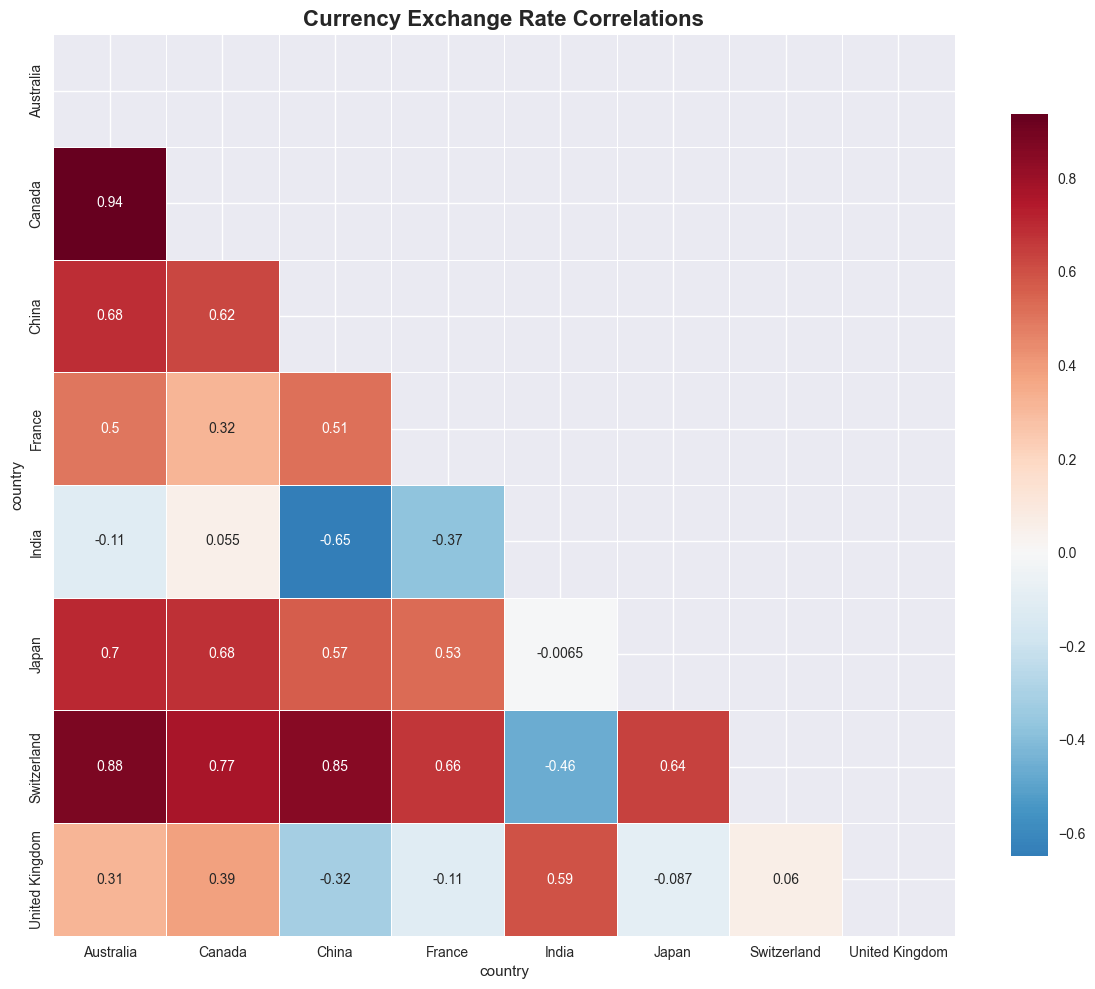


🔗 Highest Correlations:
Australia - Canada: 0.9370
Australia - Switzerland: 0.8763
China - Switzerland: 0.8534
Canada - Switzerland: 0.7742
Australia - Japan: 0.7018

🔀 Lowest Correlations:
Australia - India: -0.1120
China - United Kingdom: -0.3184
France - India: -0.3721
India - Switzerland: -0.4576
China - India: -0.6487


In [8]:
# Correlation analysis between major currencies
print("🔗 Correlation Analysis:")

# Select major currencies for correlation analysis
major_currencies = [
    'United States', 'United Kingdom', 'Japan', 'Germany', 'France', 
    'Canada', 'Australia', 'Switzerland', 'China', 'India'
]

# Create pivot table for correlation analysis
correlation_data = df[df['country'].isin(major_currencies)].pivot_table(
    index='date', 
    columns='country', 
    values='exchange_rate'
)

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

print(f"Correlation analysis for {len(major_currencies)} major currencies")
print(f"Data points per currency: {len(correlation_data)}")

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Currency Exchange Rate Correlations', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Find highest and lowest correlations
correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        country1 = correlation_matrix.columns[i]
        country2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]
        correlation_pairs.append((country1, country2, corr_value))

correlation_pairs.sort(key=lambda x: x[2], reverse=True)

print("\n🔗 Highest Correlations:")
for i in range(5):
    country1, country2, corr = correlation_pairs[i]
    print(f"{country1} - {country2}: {corr:.4f}")

print("\n🔀 Lowest Correlations:")
for i in range(-5, 0):
    country1, country2, corr = correlation_pairs[i]
    print(f"{country1} - {country2}: {corr:.4f}")

## 3.6 Volatility Deep Dive

📊 Volatility Analysis:
Volatility Categories:
volatility_category
Medium     74
Low        68
Extreme    25
High       11
Name: count, dtype: int64


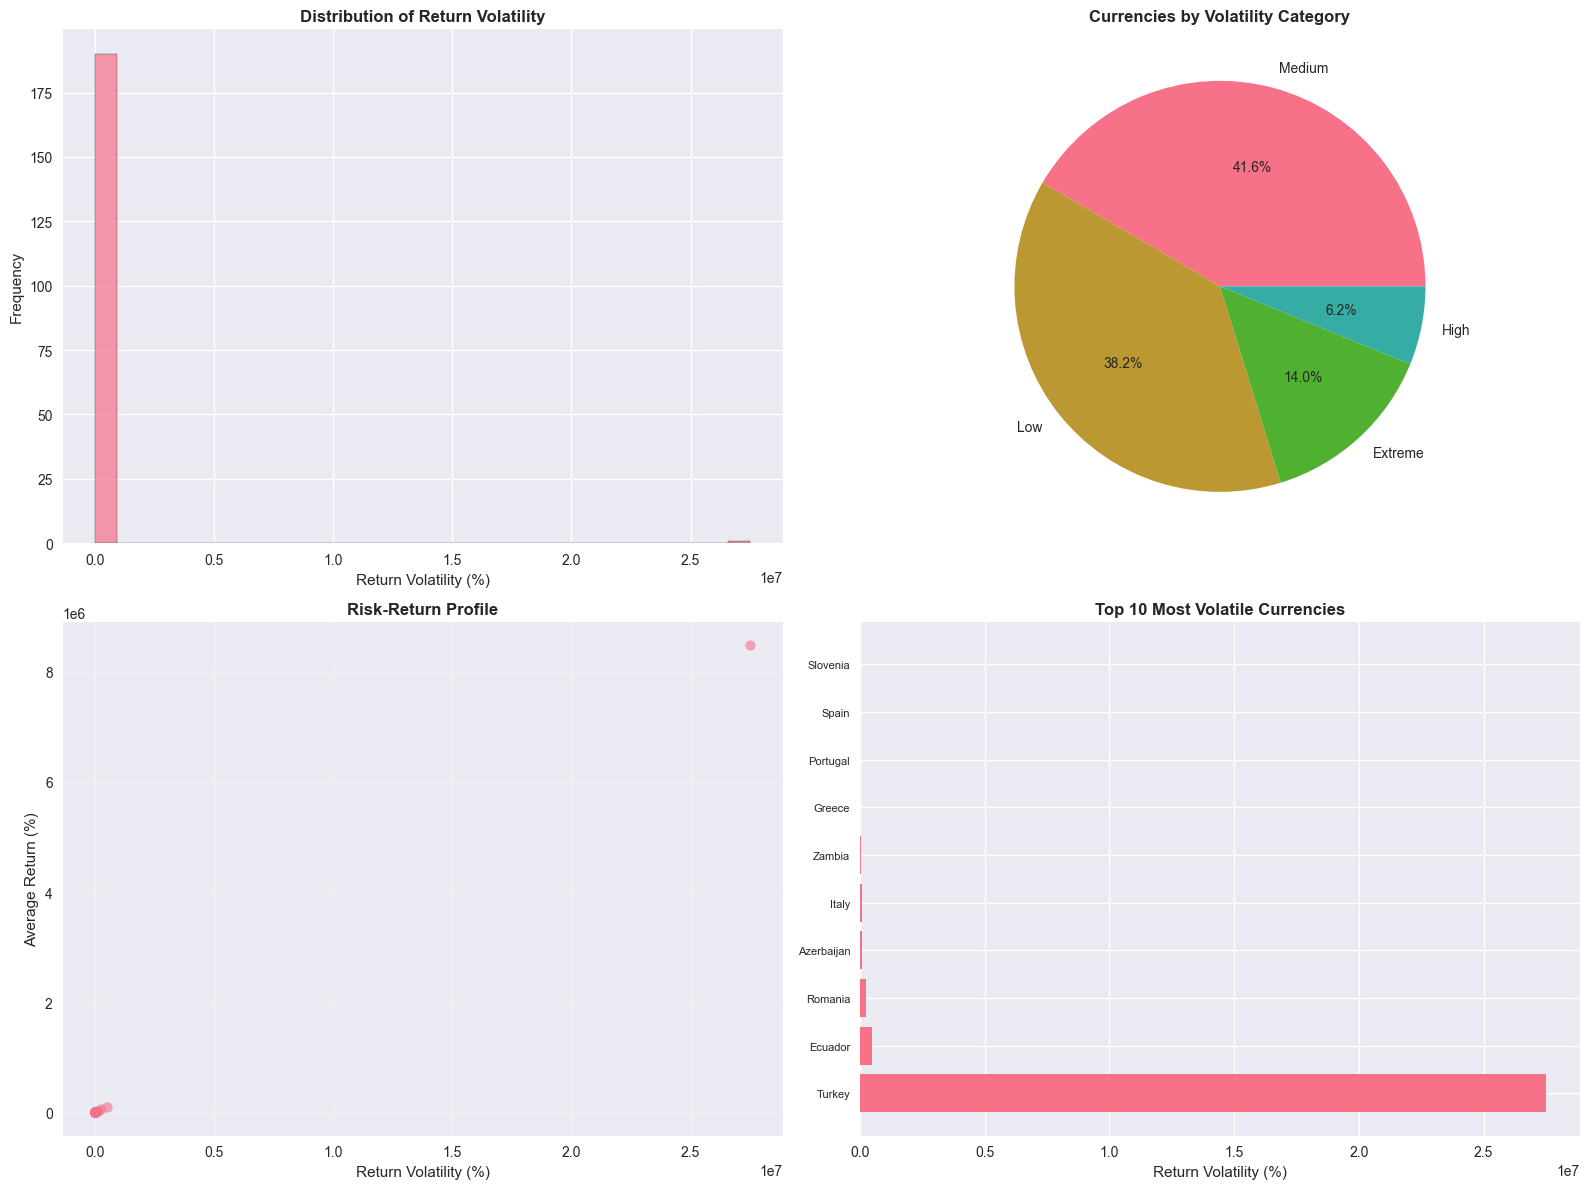


🌪️ Most Volatile Currencies:
   country  return_volatility   avg_return volatility_category
    Turkey      27490549.4972 8483340.0717             Extreme
   Ecuador        491850.5222   99992.0002             Extreme
   Romania        251140.2141   69622.5609             Extreme
Azerbaijan         97507.9344   19817.9388             Extreme
     Italy         71455.9829   27130.8141             Extreme
    Zambia         24350.4421    7956.5860             Extreme
    Greece         10538.9768    3253.8576             Extreme
  Portugal          7288.4065    2665.7628             Extreme
     Spain          6040.4707    2206.8756             Extreme
  Slovenia          5277.2931    1655.3532             Extreme

😌 Least Volatile Currencies:
             country  return_volatility  avg_return volatility_category
     Antigua-Barbuda             0.0000      0.0000                 NaN
             Bahamas             0.0000      0.0000                 NaN
             Bermuda           

In [9]:
# Volatility analysis across different dimensions
print("📊 Volatility Analysis:")

# Calculate various volatility measures
volatility_analysis = df.groupby('country').agg({
    'quarterly_return': ['std', 'mean', 'min', 'max'],
    'exchange_rate': ['std', 'mean'],
    'volatility_4q': ['mean', 'std', 'max']
}).round(4)

volatility_analysis.columns = ['_'.join(col).strip() for col in volatility_analysis.columns]
volatility_analysis = volatility_analysis.reset_index()

# Rename for clarity
volatility_analysis.rename(columns={
    'quarterly_return_std': 'return_volatility',
    'quarterly_return_mean': 'avg_return',
    'quarterly_return_min': 'min_return',
    'quarterly_return_max': 'max_return',
    'exchange_rate_std': 'rate_std',
    'exchange_rate_mean': 'avg_rate',
    'volatility_4q_mean': 'avg_rolling_vol',
    'volatility_4q_std': 'vol_of_vol',
    'volatility_4q_max': 'max_rolling_vol'
}, inplace=True)

# Create volatility categories
volatility_analysis['volatility_category'] = pd.cut(
    volatility_analysis['return_volatility'],
    bins=[0, 5, 15, 30, float('inf')],
    labels=['Low', 'Medium', 'High', 'Extreme']
)

print(f"Volatility Categories:")
print(volatility_analysis['volatility_category'].value_counts())

# Visualize volatility distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Volatility distribution
axes[0, 0].hist(volatility_analysis['return_volatility'].dropna(), bins=30, alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Distribution of Return Volatility', fontweight='bold')
axes[0, 0].set_xlabel('Return Volatility (%)')
axes[0, 0].set_ylabel('Frequency')

# 2. Volatility by category
category_counts = volatility_analysis['volatility_category'].value_counts()
axes[0, 1].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
axes[0, 1].set_title('Currencies by Volatility Category', fontweight='bold')

# 3. Return vs Volatility scatter
scatter_data = volatility_analysis.dropna(subset=['avg_return', 'return_volatility'])
axes[1, 0].scatter(scatter_data['return_volatility'], scatter_data['avg_return'], alpha=0.6)
axes[1, 0].set_xlabel('Return Volatility (%)')
axes[1, 0].set_ylabel('Average Return (%)')
axes[1, 0].set_title('Risk-Return Profile', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Top volatile currencies
top_volatile = volatility_analysis.nlargest(10, 'return_volatility')
axes[1, 1].barh(range(len(top_volatile)), top_volatile['return_volatility'])
axes[1, 1].set_yticks(range(len(top_volatile)))
axes[1, 1].set_yticklabels(top_volatile['country'], fontsize=8)
axes[1, 1].set_xlabel('Return Volatility (%)')
axes[1, 1].set_title('Top 10 Most Volatile Currencies', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n🌪️ Most Volatile Currencies:")
print(top_volatile[['country', 'return_volatility', 'avg_return', 'volatility_category']].to_string(index=False))

print("\n😌 Least Volatile Currencies:")
least_volatile = volatility_analysis.nsmallest(10, 'return_volatility')
print(least_volatile[['country', 'return_volatility', 'avg_return', 'volatility_category']].to_string(index=False))

## 3.7 Seasonal and Temporal Patterns

📅 Seasonal Pattern Analysis:
📊 Quarterly Patterns:
   quarter_num  exchange_rate_mean  exchange_rate_std  quarterly_return_mean  \
0            1        2984938.6876     121956222.5257             63861.6996   
1            2        4828809.7587     188172137.4264             86136.8867   
2            3        2791599.4497     152176294.8892             85966.8066   
3            4        2152175.4412     113329078.8416             93971.3078   

   quarterly_return_std  volatility_4q_mean  
0          2438195.7107         104810.1797  
1          2848353.8536         102760.1142  
2          2839938.0933          99960.5127  
3          2994193.7958         107539.2036  


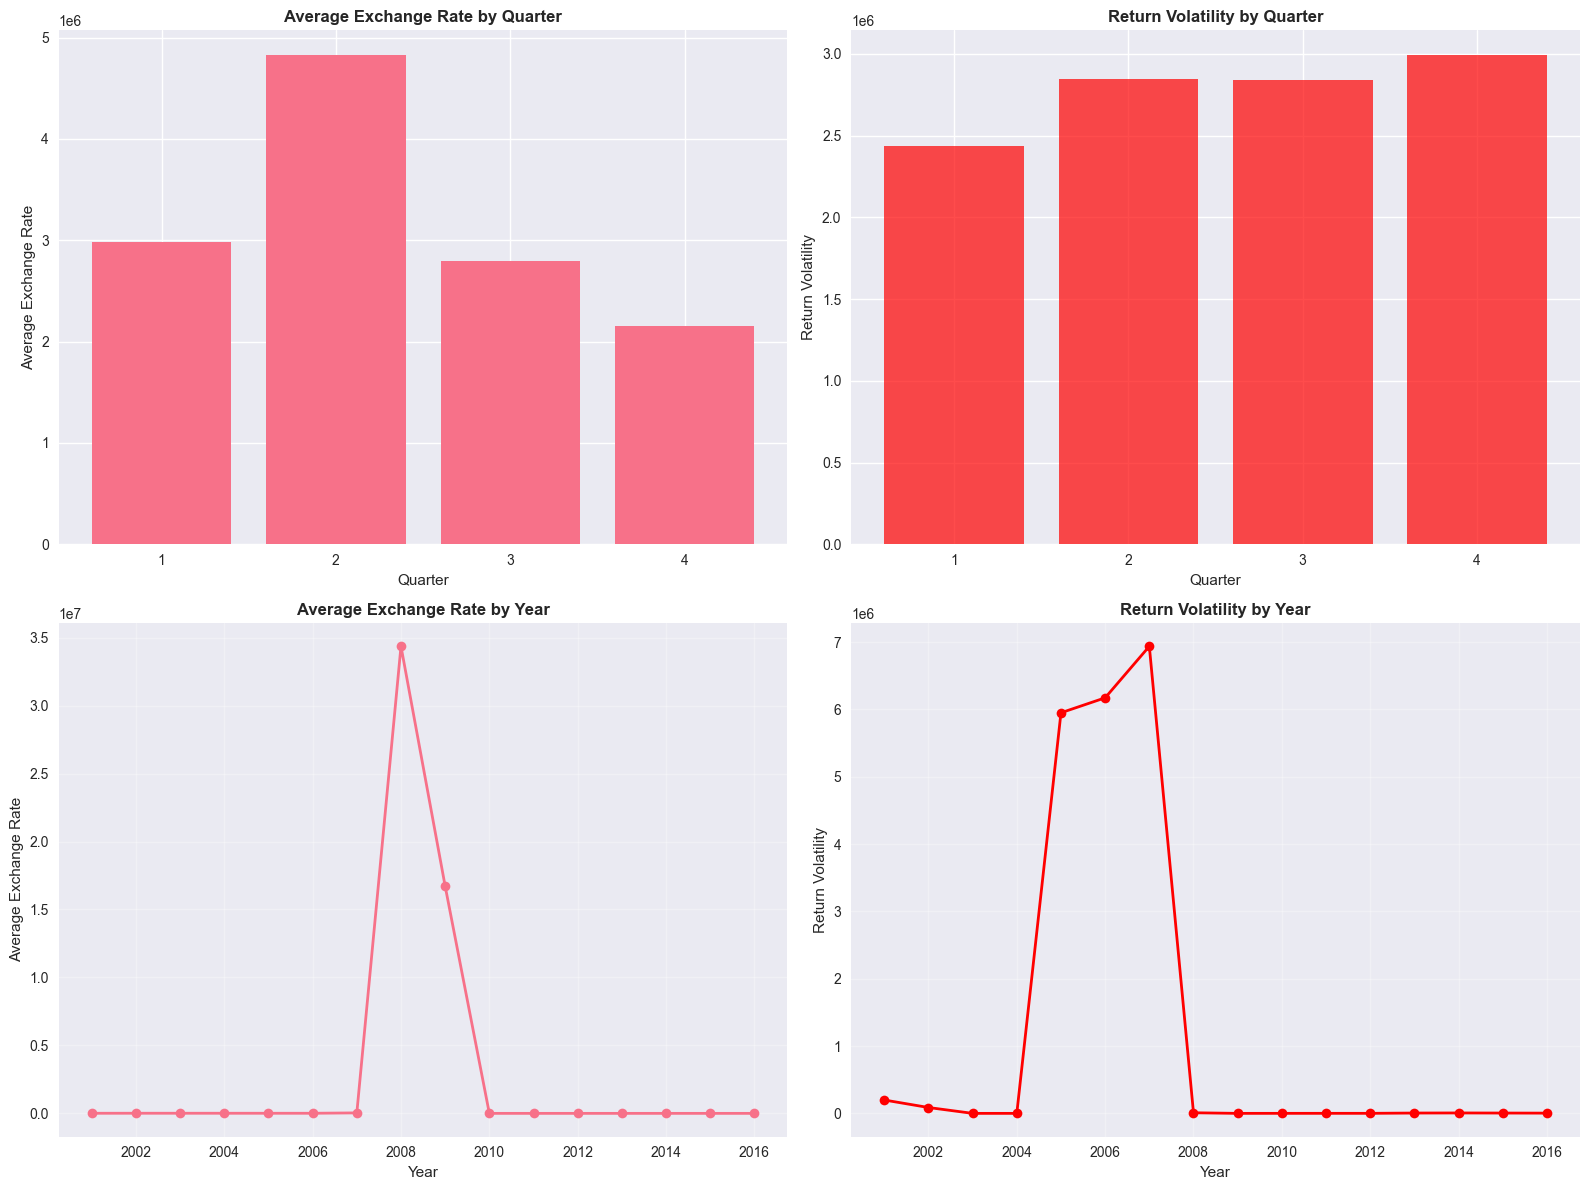


🚨 Years with Highest Volatility (Potential Crisis Periods):
2007: Volatility = 6936349.87%
2006: Volatility = 6171324.36%
2005: Volatility = 5949072.08%


In [10]:
# Seasonal pattern analysis
print("📅 Seasonal Pattern Analysis:")

# Analyze patterns by quarter and year
seasonal_stats = df.groupby(['quarter_num', 'year']).agg({
    'exchange_rate': ['count', 'mean', 'std'],
    'quarterly_return': ['mean', 'std']
}).round(4)

seasonal_stats.columns = ['_'.join(col).strip() for col in seasonal_stats.columns]
seasonal_stats = seasonal_stats.reset_index()

# Quarter-level analysis
quarter_analysis = df.groupby('quarter_num').agg({
    'exchange_rate': ['mean', 'std'],
    'quarterly_return': ['mean', 'std'],
    'volatility_4q': 'mean'
}).round(4)

quarter_analysis.columns = ['_'.join(col).strip() for col in quarter_analysis.columns]
quarter_analysis = quarter_analysis.reset_index()

print("📊 Quarterly Patterns:")
print(quarter_analysis)

# Visualize seasonal patterns
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Average exchange rate by quarter
axes[0, 0].bar(quarter_analysis['quarter_num'], quarter_analysis['exchange_rate_mean'])
axes[0, 0].set_title('Average Exchange Rate by Quarter', fontweight='bold')
axes[0, 0].set_xlabel('Quarter')
axes[0, 0].set_ylabel('Average Exchange Rate')
axes[0, 0].set_xticks([1, 2, 3, 4])

# 2. Volatility by quarter
axes[0, 1].bar(quarter_analysis['quarter_num'], quarter_analysis['quarterly_return_std'], color='red', alpha=0.7)
axes[0, 1].set_title('Return Volatility by Quarter', fontweight='bold')
axes[0, 1].set_xlabel('Quarter')
axes[0, 1].set_ylabel('Return Volatility')
axes[0, 1].set_xticks([1, 2, 3, 4])

# 3. Year-over-year trends
yearly_stats = df.groupby('year').agg({
    'exchange_rate': 'mean',
    'quarterly_return': 'std'
}).reset_index()

axes[1, 0].plot(yearly_stats['year'], yearly_stats['exchange_rate'], marker='o', linewidth=2)
axes[1, 0].set_title('Average Exchange Rate by Year', fontweight='bold')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Average Exchange Rate')
axes[1, 0].grid(True, alpha=0.3)

# 4. Volatility trends by year
axes[1, 1].plot(yearly_stats['year'], yearly_stats['quarterly_return'], marker='o', linewidth=2, color='red')
axes[1, 1].set_title('Return Volatility by Year', fontweight='bold')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Return Volatility')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Identify crisis periods
crisis_years = yearly_stats.nlargest(3, 'quarterly_return')
print("\n🚨 Years with Highest Volatility (Potential Crisis Periods):")
for _, row in crisis_years.iterrows():
    print(f"{int(row['year'])}: Volatility = {row['quarterly_return']:.2f}%")

## 3.8 Key Insights and Summary

In [11]:
# Generate key insights from EDA
print("🔍 KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("=" * 60)

# Data quality insights
data_completeness = (df['exchange_rate'].notna().sum() / len(df)) * 100
print(f"\n📊 DATA QUALITY:")
print(f"• Overall data completeness: {data_completeness:.1f}%")
print(f"• Countries analyzed: {df['country'].nunique()}")
print(f"• Time span: {df['date'].min().strftime('%Y-%m')} to {df['date'].max().strftime('%Y-%m')}")

# Distribution insights
print(f"\n📈 DISTRIBUTION CHARACTERISTICS:")
print(f"• Highly right-skewed distribution (skewness: {df['exchange_rate'].skew():.2f})")
print(f"• Median exchange rate: {df['exchange_rate'].median():.2f}")
print(f"• 95% of currencies trade below: {df['exchange_rate'].quantile(0.95):.2f}")

# Volatility insights
high_vol_count = (volatility_analysis['volatility_category'] == 'High').sum()
extreme_vol_count = (volatility_analysis['volatility_category'] == 'Extreme').sum()
print(f"\n🌪️ VOLATILITY PATTERNS:")
print(f"• High volatility currencies: {high_vol_count} ({high_vol_count/len(volatility_analysis)*100:.1f}%)")
print(f"• Extreme volatility currencies: {extreme_vol_count} ({extreme_vol_count/len(volatility_analysis)*100:.1f}%)")
print(f"• Most volatile: {top_volatile.iloc[0]['country']} ({top_volatile.iloc[0]['return_volatility']:.1f}%)")
print(f"• Least volatile: {least_volatile.iloc[0]['country']} ({least_volatile.iloc[0]['return_volatility']:.1f}%)")

# Temporal insights
print(f"\n📅 TEMPORAL PATTERNS:")
print(f"• Crisis years identified: {', '.join([str(int(year)) for year in crisis_years['year']])}")
print(f"• Highest volatility quarter: Q{quarter_analysis.loc[quarter_analysis['quarterly_return_std'].idxmax(), 'quarter_num']}")
print(f"• Most stable quarter: Q{quarter_analysis.loc[quarter_analysis['quarterly_return_std'].idxmin(), 'quarter_num']}")

# Correlation insights
if len(correlation_pairs) > 0:
    highest_corr = correlation_pairs[0]
    lowest_corr = correlation_pairs[-1]
    print(f"\n🔗 CURRENCY RELATIONSHIPS:")
    print(f"• Highest correlation: {highest_corr[0]} - {highest_corr[1]} ({highest_corr[2]:.3f})")
    print(f"• Lowest correlation: {lowest_corr[0]} - {lowest_corr[1]} ({lowest_corr[2]:.3f})")

print(f"\n🎯 NEXT STEPS:")
print(f"• Investigate crisis periods in detail (2008 financial crisis)")
print(f"• Analyze regional currency patterns")
print(f"• Examine currency regime changes")
print(f"• Build predictive models for volatility")

print("\n" + "=" * 60)
print("✅ EDA COMPLETED - Ready for Statistical Analysis")
print("➡️ Next: Statistical Analysis (04_statistical_analysis.ipynb)")

🔍 KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS

📊 DATA QUALITY:
• Overall data completeness: 84.3%
• Countries analyzed: 191
• Time span: 2001-03 to 2016-09

📈 DISTRIBUTION CHARACTERISTICS:
• Highly right-skewed distribution (skewness: 48.53)
• Median exchange rate: 12.12
• 95% of currencies trade below: 5185.75

🌪️ VOLATILITY PATTERNS:
• High volatility currencies: 11 (5.8%)
• Extreme volatility currencies: 25 (13.1%)
• Most volatile: Turkey (27490549.5%)
• Least volatile: Antigua-Barbuda (0.0%)

📅 TEMPORAL PATTERNS:
• Crisis years identified: 2007, 2006, 2005
• Highest volatility quarter: Q4
• Most stable quarter: Q1

🔗 CURRENCY RELATIONSHIPS:
• Highest correlation: Australia - Canada (0.937)
• Lowest correlation: China - India (-0.649)

🎯 NEXT STEPS:
• Investigate crisis periods in detail (2008 financial crisis)
• Analyze regional currency patterns
• Examine currency regime changes
• Build predictive models for volatility

✅ EDA COMPLETED - Ready for Statistical Analysis
➡️ Next: Sta